# Metryka euklidesowa z 3 klasami

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


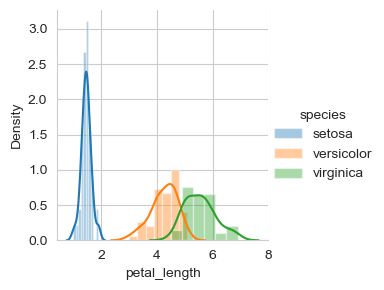

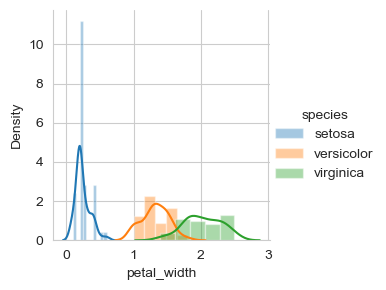

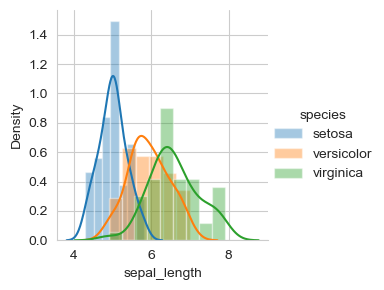

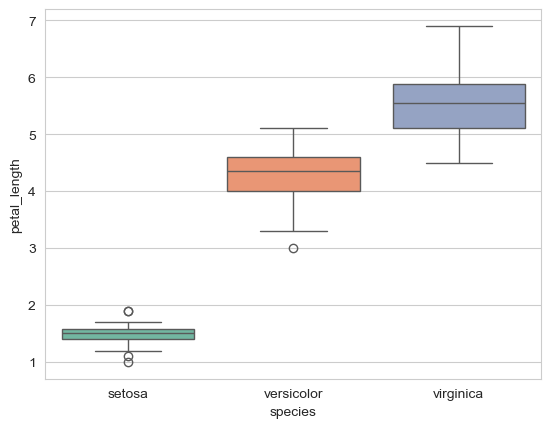

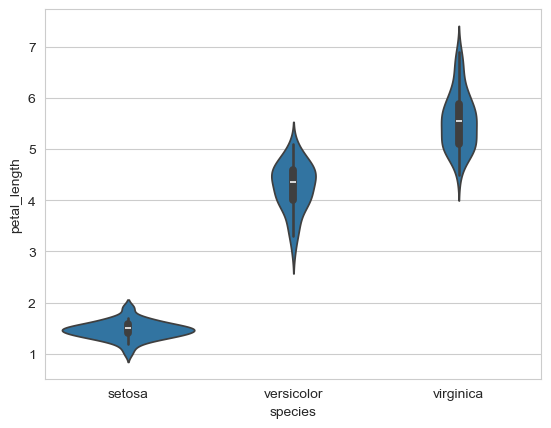

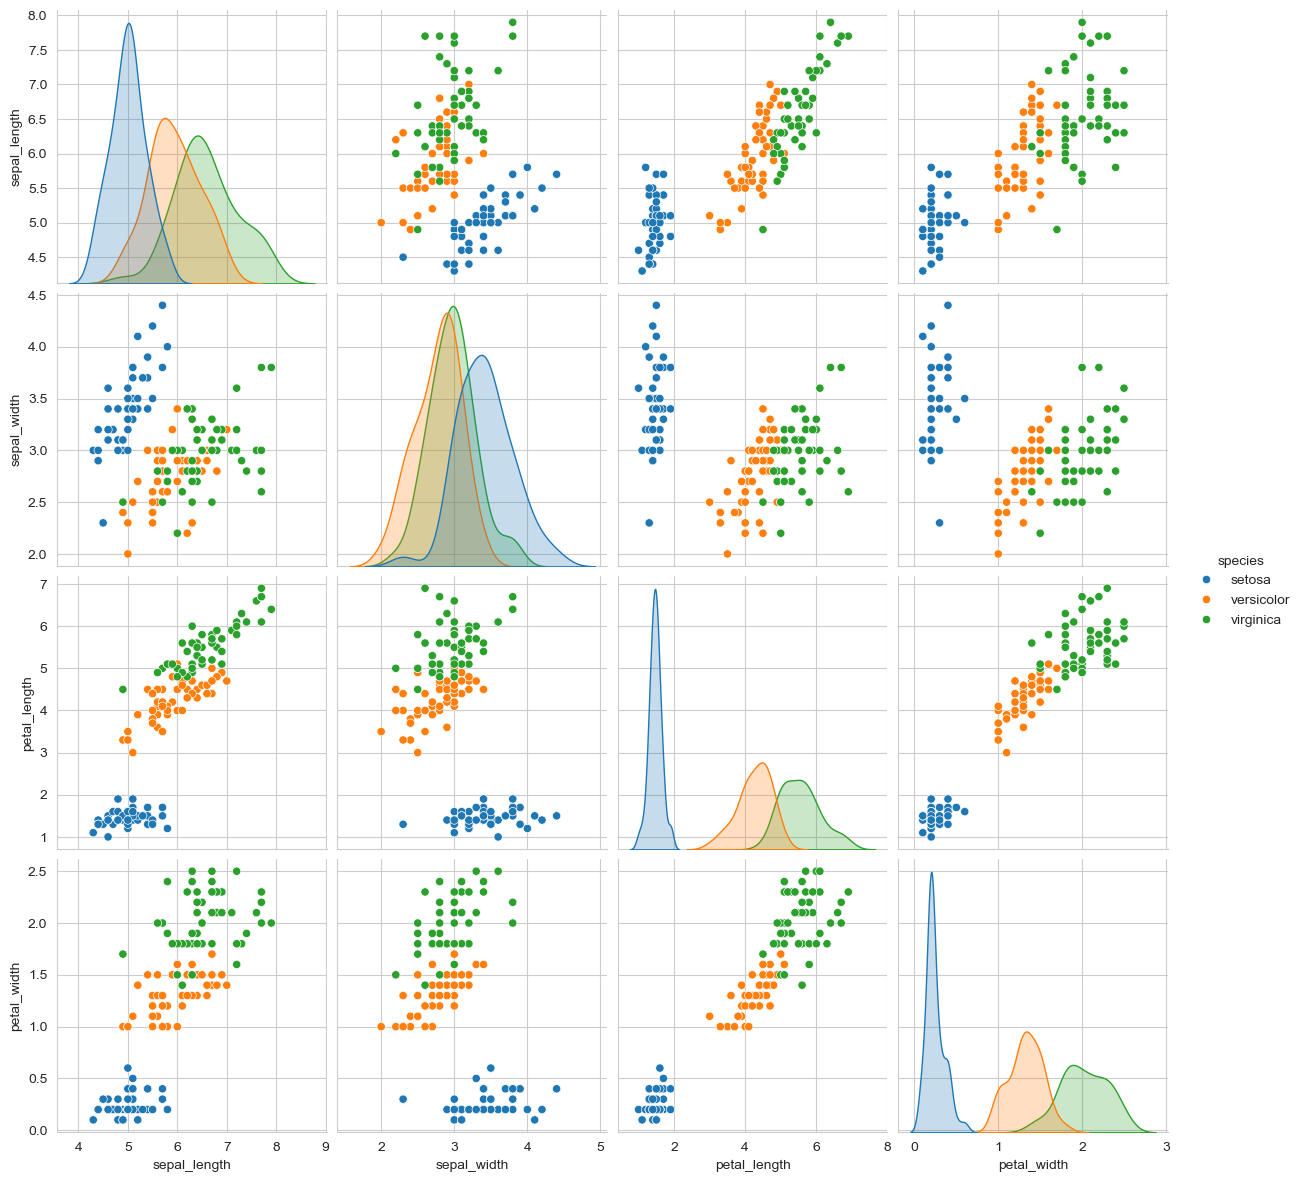

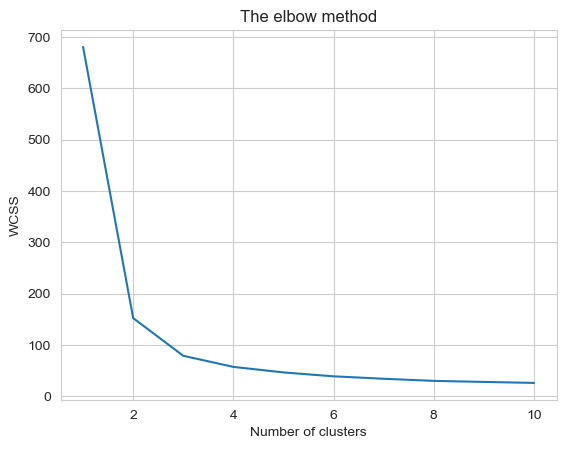

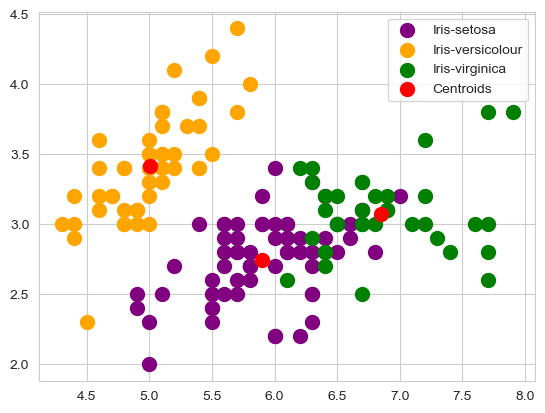

In [26]:
iris = pd.read_csv("iris.csv")
x = iris.iloc[:, [0, 1, 2, 3]].values
iris.info()
iris[0:10]
iris_outcome = pd.crosstab(index=iris["species"],  # Make a crosstab
                              columns="count")      # Name the count column

iris_outcome
iris_setosa=iris.loc[iris["species"]=="Iris-setosa"]
iris_virginica=iris.loc[iris["species"]=="Iris-virginica"]
iris_versicolor=iris.loc[iris["species"]=="Iris-versicolor"]
sns.FacetGrid(iris,hue="species").map(sns.distplot,"petal_length").add_legend()
sns.FacetGrid(iris,hue="species").map(sns.distplot,"petal_width").add_legend()
sns.FacetGrid(iris,hue="species").map(sns.distplot,"sepal_length").add_legend()
plt.show()
sns.boxplot(x="species",y="petal_length",data=iris, palette="Set2")
plt.show()
sns.violinplot(x="species",y="petal_length",data=iris)
plt.show()
sns.set_style("whitegrid")
sns.pairplot(iris,hue="species",size=3);
plt.show()
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, metric='manhattan'init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)
#Visualising the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

plt.legend()

# Metryka euklidesowa z 2 klasami

Liczba elementów w klasach:
 species
setosa        50
versicolor    50
Name: count, dtype: int64

Centroidy:
 {'setosa': [5.006, 3.418, 1.464, 0.244], 'versicolor': [5.936, 2.77, 4.26, 1.326]}


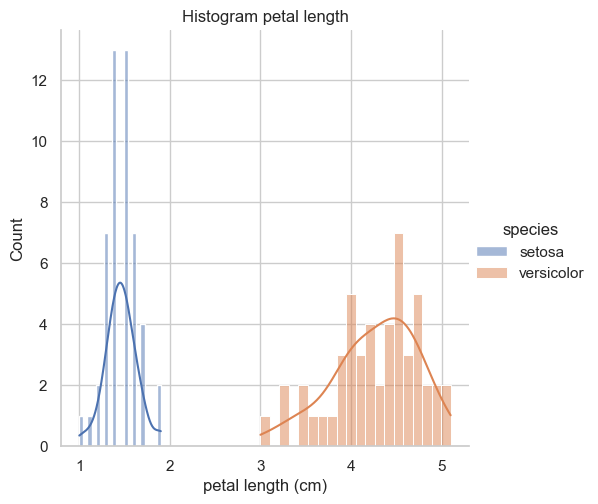

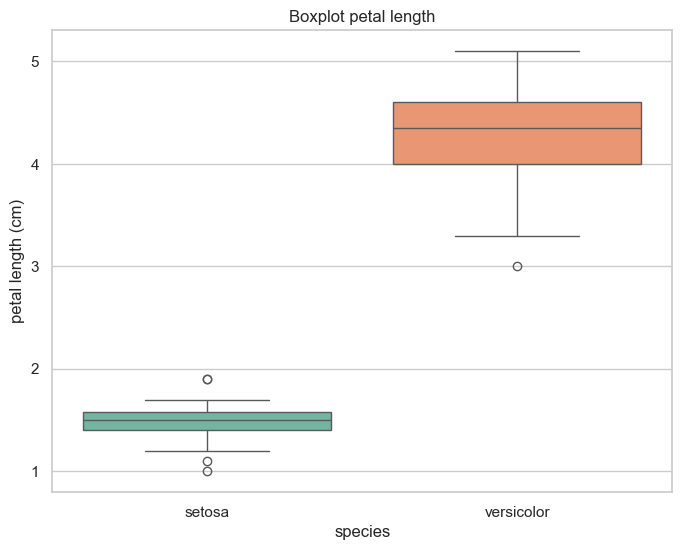

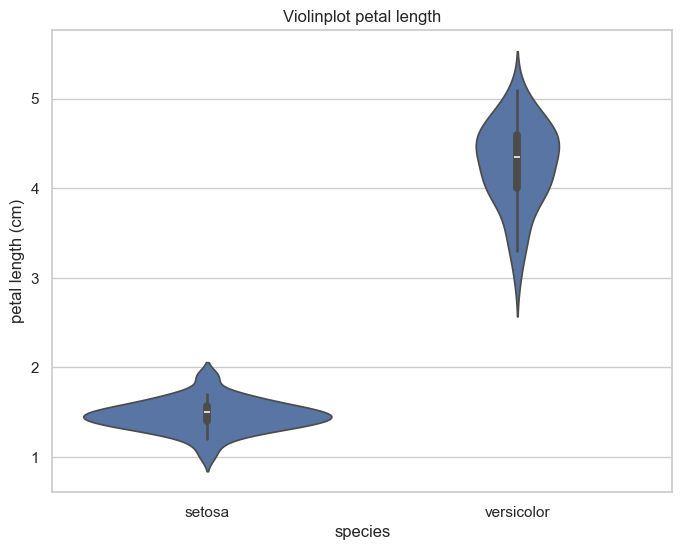

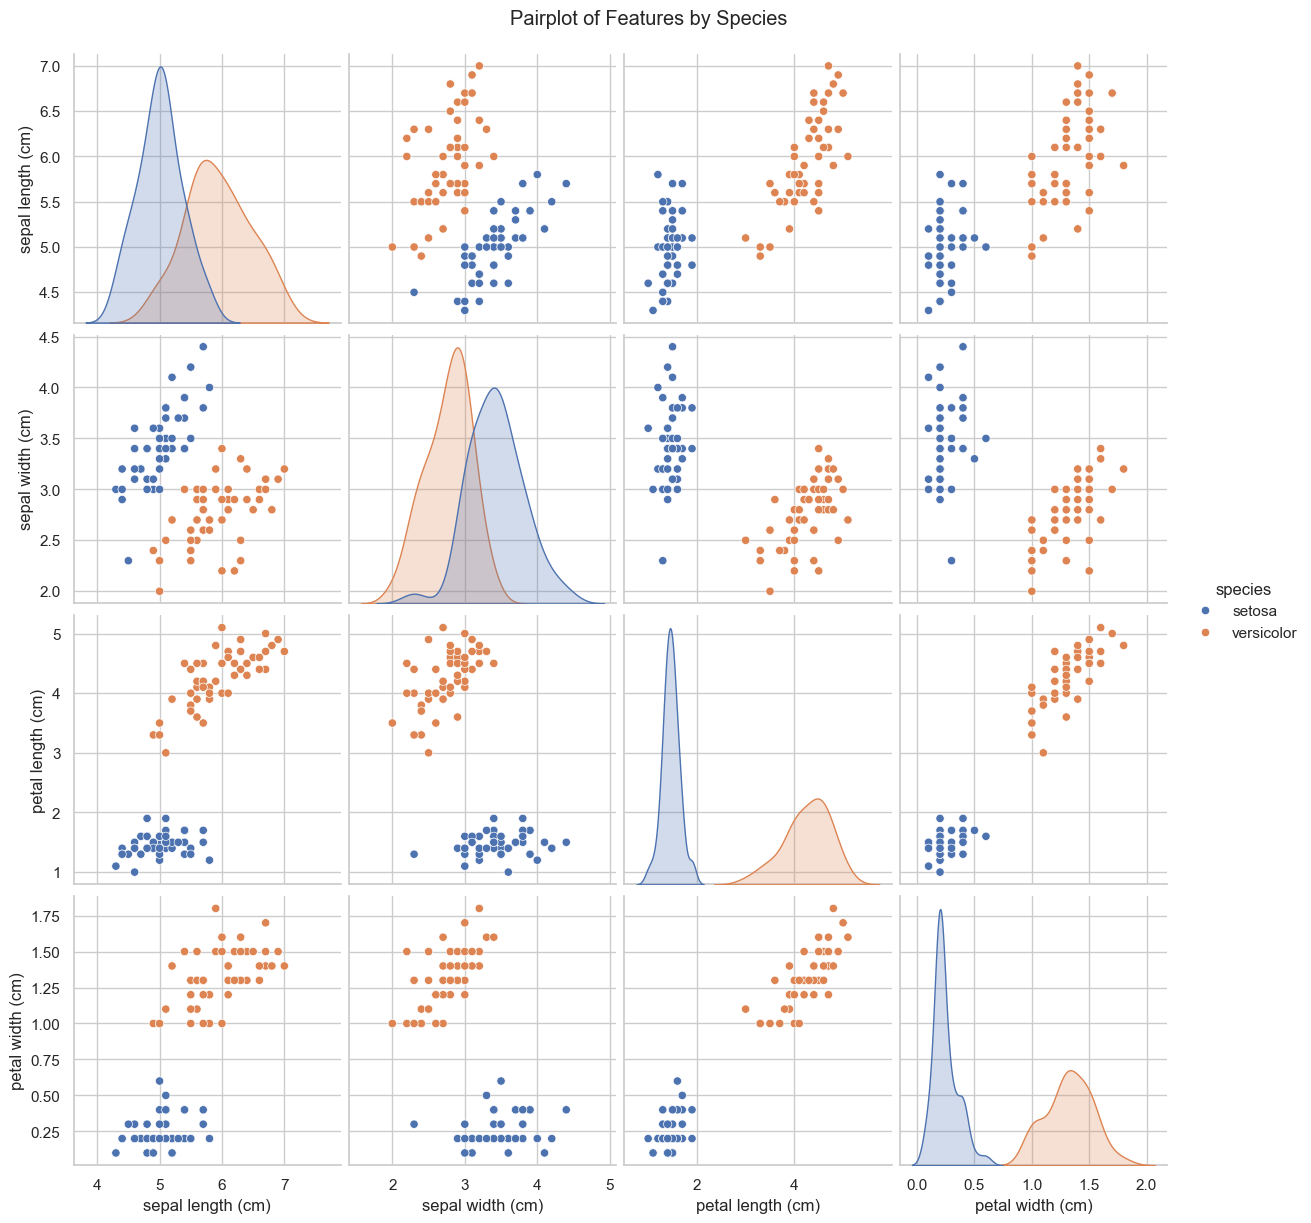

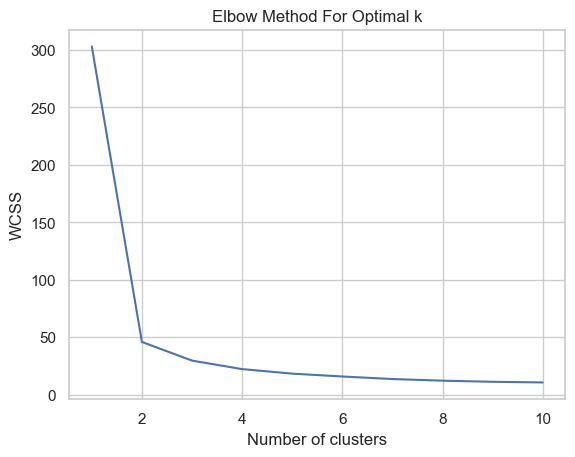

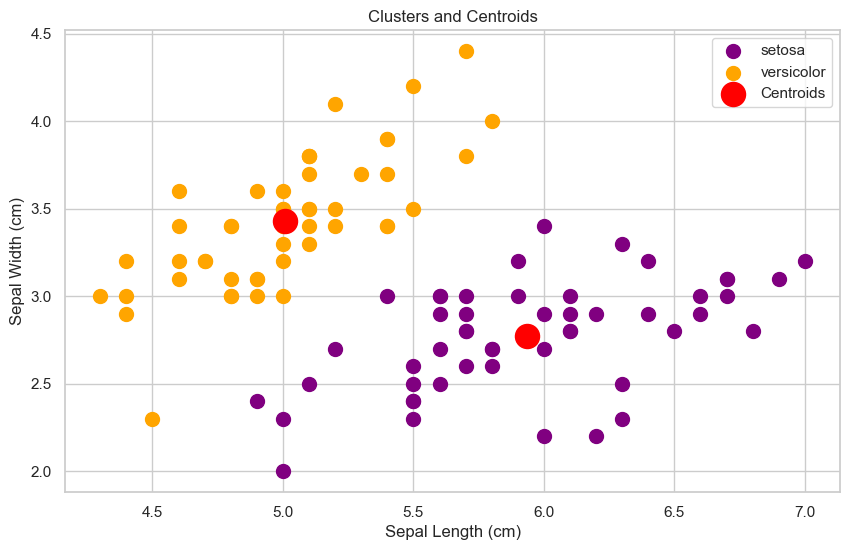

In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

# Load the Iris dataset
iris_data = load_iris()
iris = pd.DataFrame(data=iris_data.data, columns=iris_data.feature_names)
iris['species'] = iris_data.target

# Map target integers to class names
iris['species'] = iris['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# Remove the 'virginica' class
iris = iris[iris['species'] != 'virginica']

# Liczba elementów w klasach
class_counts = iris['species'].value_counts()
print("Liczba elementów w klasach:\n", class_counts)

# Centroidy (actual centroids will be computed by KMeans later)
centroids = {
    'setosa': [5.006, 3.418, 1.464, 0.244],
    'versicolor': [5.936, 2.770, 4.260, 1.326]
}
print("\nCentroidy:\n", centroids)

# FacetGrid z histogramem
g = sns.FacetGrid(iris, hue="species", height=5)
g.map(sns.histplot, "petal length (cm)", bins=20, kde=True)
g.add_legend()
plt.title('Histogram petal length')
plt.show()

# Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x="species", y="petal length (cm)", data=iris, palette="Set2")
plt.title('Boxplot petal length')
plt.show()

# Violinplot
plt.figure(figsize=(8, 6))
sns.violinplot(x="species", y="petal length (cm)", data=iris)
plt.title('Violinplot petal length')
plt.show()

# Pairplot
sns.pairplot(iris, hue="species", height=3)
plt.suptitle('Pairplot of Features by Species', y=1.02)
plt.show()

# KMeans Elbow Method
X = iris.iloc[:, :4].values
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # Within Cluster Sum of Squares
plt.show()

# KMeans Clustering
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)

# Wykres rozrzutu z klastrami
plt.figure(figsize=(10, 6))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=100, c='purple', label='setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=100, c='orange', label='versicolor')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.title('Clusters and Centroids')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend()
plt.show()


Liczba elementów w klasach:
 species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


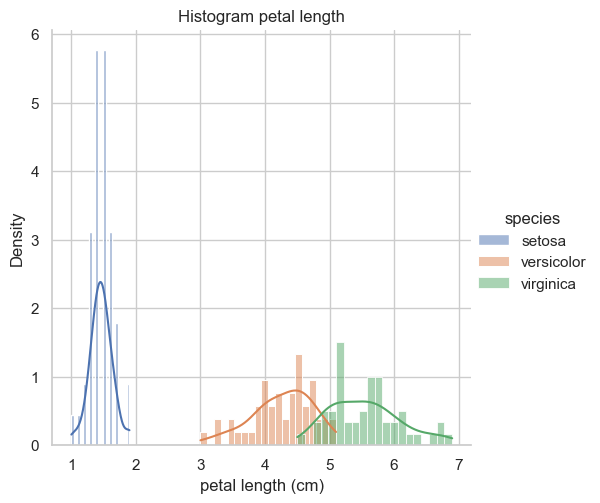

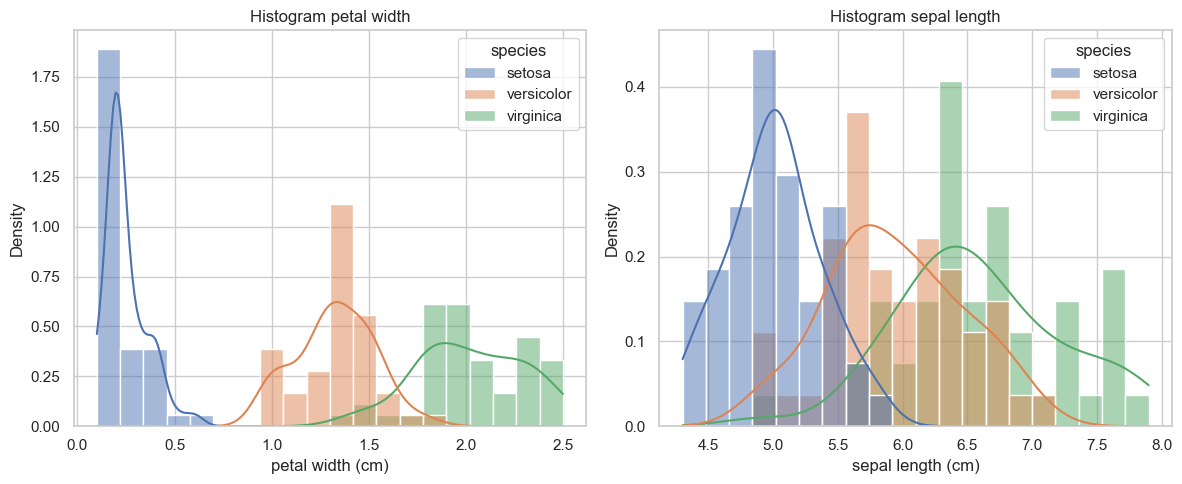

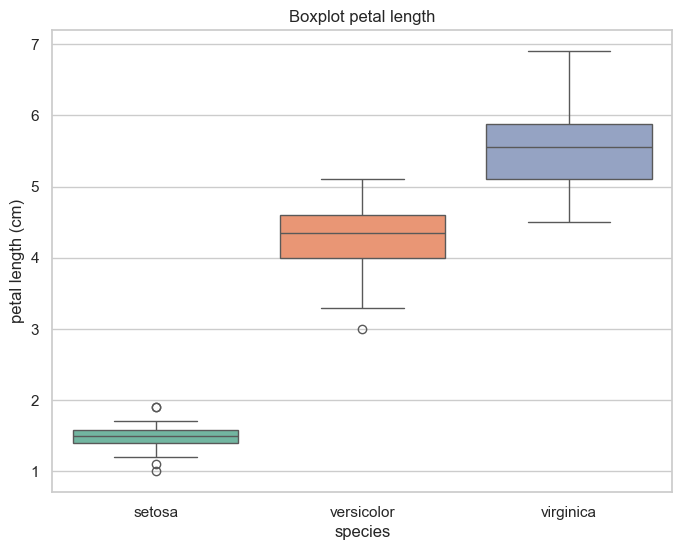

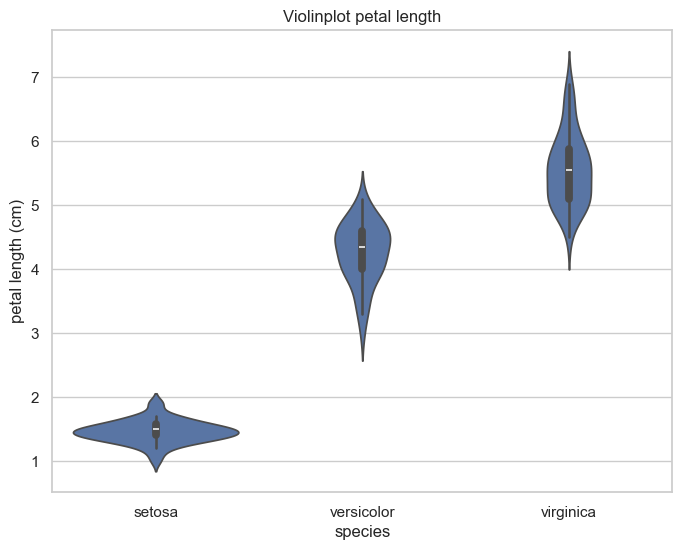

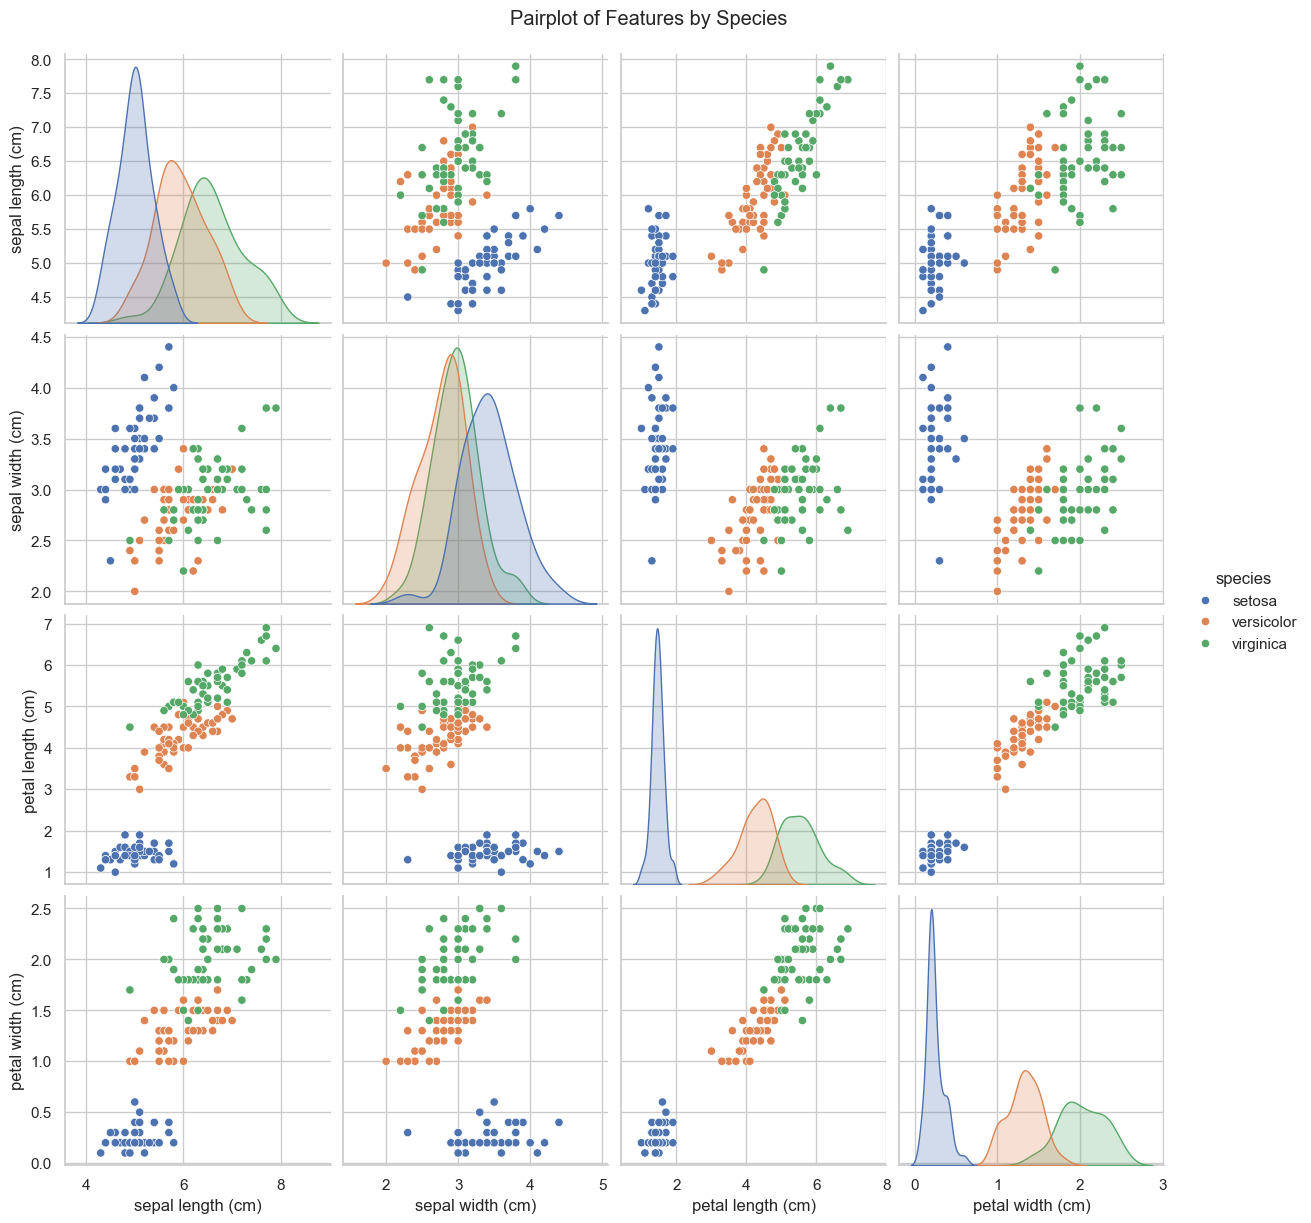

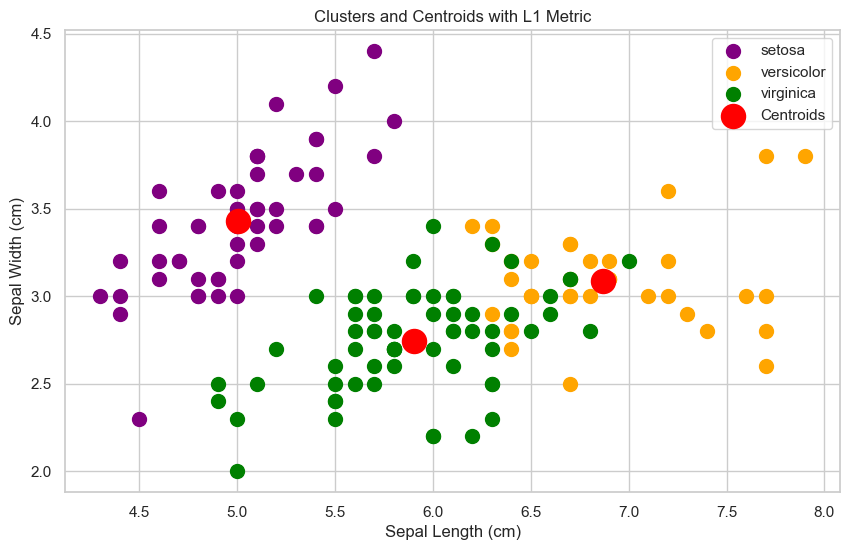

In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

# Load the Iris dataset
iris_data = load_iris()
iris = pd.DataFrame(data=iris_data.data, columns=iris_data.feature_names)
iris['species'] = iris_data.target

# Map target integers to class names
iris['species'] = iris['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# Liczba elementów w klasach
class_counts = iris['species'].value_counts()
print("Liczba elementów w klasach:\n", class_counts)

# FacetGrid z histogramem
g = sns.FacetGrid(iris, hue="species", height=5)
g.map(sns.histplot, "petal length (cm)", bins=20, kde=True, stat="density")
g.add_legend()
plt.title('Histogram petal length')
plt.show()

# Histogramy dla petal width i sepal length
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histogram dla petal width
sns.histplot(data=iris, x="petal width (cm)", hue="species", bins=20, kde=True, stat="density", ax=axes[0])
axes[0].set_title('Histogram petal width')

# Histogram dla sepal length
sns.histplot(data=iris, x="sepal length (cm)", hue="species", bins=20, kde=True, stat="density", ax=axes[1])
axes[1].set_title('Histogram sepal length')

plt.tight_layout()
plt.show()

# Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x="species", y="petal length (cm)", data=iris, palette="Set2")
plt.title('Boxplot petal length')
plt.show()

# Violinplot
plt.figure(figsize=(8, 6))
sns.violinplot(x="species", y="petal length (cm)", data=iris)
plt.title('Violinplot petal length')
plt.show()

# Pairplot
sns.pairplot(iris, hue="species", height=3)
plt.suptitle('Pairplot of Features by Species', y=1.02)
plt.show()

# KMeans with L1 metric
X = iris.iloc[:, :4].values
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(X)

# KMeans with L1 distance (Manhattan)
def kmeans_l1(X, n_clusters, max_iter=300):
    # Randomly initialize centroids
    centroids = X[np.random.choice(X.shape[0], n_clusters, replace=False)]
    for _ in range(max_iter):
        # Compute distances using L1 metric
        distances = np.abs(X[:, np.newaxis] - centroids).sum(axis=2)
        # Assign clusters based on the closest centroid
        labels = np.argmin(distances, axis=1)
        # Update centroids
        new_centroids = np.array([X[labels == i].mean(axis=0) if np.any(labels == i) else centroids[i] for i in range(n_clusters)])
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    return labels, centroids

# Execute KMeans with L1 distance
y_l1_kmeans, centroids_l1 = kmeans_l1(X, n_clusters=3)

# Wykres rozrzutu z klastrami
plt.figure(figsize=(10, 6))
plt.scatter(X[y_l1_kmeans == 0, 0], X[y_l1_kmeans == 0, 1], s=100, c='purple', label='setosa')
plt.scatter(X[y_l1_kmeans == 1, 0], X[y_l1_kmeans == 1, 1], s=100, c='orange', label='versicolor')
plt.scatter(X[y_l1_kmeans == 2, 0], X[y_l1_kmeans == 2, 1], s=100, c='green', label='virginica')

# Plotting the centroids of the clusters
plt.scatter(centroids_l1[:, 0], centroids_l1[:, 1], s=300, c='red', label='Centroids')
plt.title('Clusters and Centroids with L1 Metric')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend()
plt.show()
